In [3]:
!pip install imbalanced-learn
!pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.2/156.2 kB 4.1 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 87.9 MB/s eta 0:00:00:00:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 303.9/303.9 kB 36.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 16.3 MB/s eta 0:00:0000:01:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 89.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 116.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.1/103.1 kB 14.5 MB/s eta 0:00:00


In [4]:
import numpy as np
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
import matplotlib.pyplot as plt

# Create a synthetic imbalanced dataset
X, y = make_classification(n_classes=2, class_sep=2,
                           weights=[0.1, 0.9], n_informative=3, n_redundant=1, flip_y=0,
                           n_features=20, n_clusters_per_class=1, n_samples=1000, random_state=10)

# Summarize class distribution
print(f"Before sampling: {Counter(y)}")

# Define the pipeline
over = SMOTE(sampling_strategy=0.1, random_state=42)
under = RandomUnderSampler(sampling_strategy=0.5, random_state=42)
pipeline = Pipeline(steps=[('o', over), ('u', under)])

# Transform the dataset
X_resampled, y_resampled = pipeline.fit_resample(X, y)

# Summarize the new class distribution
print(f"After sampling: {Counter(y_resampled)}")

# Plotting the class distribution before and after resampling
fig, axs = plt.subplots(1, 2, figsize=(14, 7))

# Before sampling
axs[0].bar(['Class 0', 'Class 1'], [Counter(y)[0], Counter(y)[1]], color=['blue', 'orange'])
axs[0].set_title('Class Distribution Before Sampling')
axs[0].set_ylabel('Frequency')

# After sampling
axs[1].bar(['Class 0', 'Class 1'], [Counter(y_resampled)[0], Counter(y_resampled)[1]], color=['blue', 'orange'])
axs[1].set_title('Class Distribution After Sampling')
axs[1].set_ylabel('Frequency')

plt.show()


Before sampling: Counter({1: 900, 0: 100})


ValueError: The specified ratio required to remove samples from the minority class while trying to generate new samples. Please increase the ratio.

In [5]:
import numpy as np
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
import matplotlib.pyplot as plt

# Create a synthetic imbalanced dataset
X, y = make_classification(n_classes=2, class_sep=2,
                           weights=[0.1, 0.9], n_informative=3, n_redundant=1, flip_y=0,
                           n_features=20, n_clusters_per_class=1, n_samples=1000, random_state=10)

# Summarize class distribution
print(f"Before sampling: {Counter(y)}")

# Define the sampling strategy
strategy_over = 0.3  # Over-sample the minority class to 30% of the majority class
strategy_under = 0.6  # Under-sample the majority class to 60% of its original size

# Ensure that we are not under-sampling below the original minority class count
minority_class_count = Counter(y)[1]
strategy_under = max(minority_class_count / (Counter(y)[0] * strategy_under), strategy_over)

# Define the pipeline
over = SMOTE(sampling_strategy=strategy_over, random_state=42)
under = RandomUnderSampler(sampling_strategy=strategy_under, random_state=42)
pipeline = Pipeline(steps=[('o', over), ('u', under)])

# Transform the dataset
X_resampled, y_resampled = pipeline.fit_resample(X, y)

# Summarize the new class distribution
print(f"After sampling: {Counter(y_resampled)}")

# Plotting the class distribution before and after resampling
fig, axs = plt.subplots(1, 2, figsize=(14, 7))

# Before sampling
axs[0].bar(['Class 0', 'Class 1'], [Counter(y)[0], Counter(y)[1]], color=['blue', 'orange'])
axs[0].set_title('Class Distribution Before Sampling')
axs[0].set_ylabel('Frequency')

# After sampling
axs[1].bar(['Class 0', 'Class 1'], [Counter(y_resampled)[0], Counter(y_resampled)[1]], color=['blue', 'orange'])
axs[1].set_title('Class Distribution After Sampling')
axs[1].set_ylabel('Frequency')

plt.show()


Before sampling: Counter({1: 900, 0: 100})


InvalidParameterError: The 'sampling_strategy' parameter of RandomUnderSampler must be a float in the range (0.0, 1.0], a str among {'majority', 'not minority', 'not majority', 'auto', 'all'}, an instance of 'collections.abc.Mapping' or a callable. Got 15.0 instead.

In [6]:
import numpy as np
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
import matplotlib.pyplot as plt

# Create a synthetic imbalanced dataset
X, y = make_classification(n_classes=2, class_sep=2,
                           weights=[0.1, 0.9], n_informative=3, n_redundant=1, flip_y=0,
                           n_features=20, n_clusters_per_class=1, n_samples=1000, random_state=10)

# Summarize class distribution
print(f"Before sampling: {Counter(y)}")

# Define the sampling strategy for over-sampling
strategy_over = 0.5  # Over-sample the minority class to 50% of the majority class

# Perform over-sampling
over = SMOTE(sampling_strategy=strategy_over, random_state=42)
X_over, y_over = over.fit_resample(X, y)

# Now, define the sampling strategy for under-sampling
# We will under-sample the majority class to have it be exactly double the size of the new minority class size
strategy_under = {0: int(Counter(y_over)[1] * 2), 1: Counter(y_over)[1]}

# Perform under-sampling
under = RandomUnderSampler(sampling_strategy=strategy_under, random_state=42)
X_resampled, y_resampled = under.fit_resample(X_over, y_over)

# Summarize the new class distribution
print(f"After sampling: {Counter(y_resampled)}")

# Plotting the class distribution before and after resampling
fig, axs = plt.subplots(1, 2, figsize=(14, 7))

# Before sampling
axs[0].bar(['Class 0', 'Class 1'], [Counter(y)[0], Counter(y)[1]], color=['blue', 'orange'])
axs[0].set_title('Class Distribution Before Sampling')
axs[0].set_ylabel('Frequency')

# After sampling
axs[1].bar(['Class 0', 'Class 1'], [Counter(y_resampled)[0], Counter(y_resampled)[1]], color=['blue', 'orange'])
axs[1].set_title('Class Distribution After Sampling')
axs[1].set_ylabel('Frequency')

plt.show()


Before sampling: Counter({1: 900, 0: 100})


ValueError: With under-sampling methods, the number of samples in a class should be less or equal to the original number of samples. Originally, there is 450 samples and 1800 samples are asked.

Before sampling: Counter({1: 900, 0: 100})
Cannot under-sample the majority class to 1800 samples, reducing to original size 100 instead.
After sampling: Counter({1: 900, 0: 100})


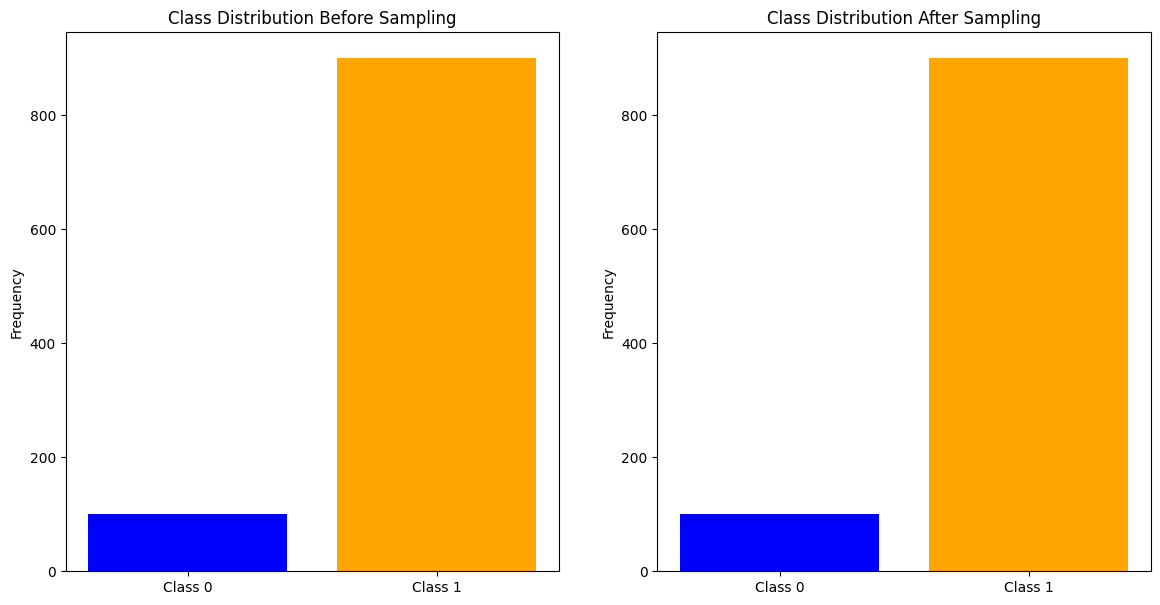

In [7]:
import numpy as np
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
import matplotlib.pyplot as plt

# Create a synthetic imbalanced dataset
X, y = make_classification(n_classes=2, class_sep=2,
                           weights=[0.1, 0.9], n_informative=3, n_redundant=1, flip_y=0,
                           n_features=20, n_clusters_per_class=1, n_samples=1000, random_state=10)

# Summarize class distribution
print(f"Before sampling: {Counter(y)}")

# Define the sampling strategy for over-sampling
strategy_over = 0.5  # Over-sample the minority class to 50% of the majority class

# Perform over-sampling
over = SMOTE(sampling_strategy=strategy_over, random_state=42)
X_over, y_over = over.fit_resample(X, y)

# Now, define the sampling strategy for under-sampling
# We will under-sample the majority class to have it be exactly double the size of the new minority class size
strategy_under = {0: int(Counter(y_over)[1] * 2), 1: Counter(y_over)[1]}

# Check if the new majority class size is smaller than its original size
if strategy_under[0] > Counter(y)[0]:
    print(f"Cannot under-sample the majority class to {strategy_under[0]} samples, reducing to original size {Counter(y)[0]} instead.")
    strategy_under[0] = Counter(y)[0]

# Perform under-sampling
under = RandomUnderSampler(sampling_strategy=strategy_under, random_state=42)
X_resampled, y_resampled = under.fit_resample(X_over, y_over)

# Summarize the new class distribution
print(f"After sampling: {Counter(y_resampled)}")

# Plotting the class distribution before and after resampling
fig, axs = plt.subplots(1, 2, figsize=(14, 7))

# Before sampling
axs[0].bar(['Class 0', 'Class 1'], [Counter(y)[0], Counter(y)[1]], color=['blue', 'orange'])
axs[0].set_title('Class Distribution Before Sampling')
axs[0].set_ylabel('Frequency')

# After sampling
axs[1].bar(['Class 0', 'Class 1'], [Counter(y_resampled)[0], Counter(y_resampled)[1]], color=['blue', 'orange'])
axs[1].set_title('Class Distribution After Sampling')
axs[1].set_ylabel('Frequency')

plt.show()


Before sampling: Counter({1: 900, 0: 100})
After over-sampling: Counter({1: 900, 0: 450})


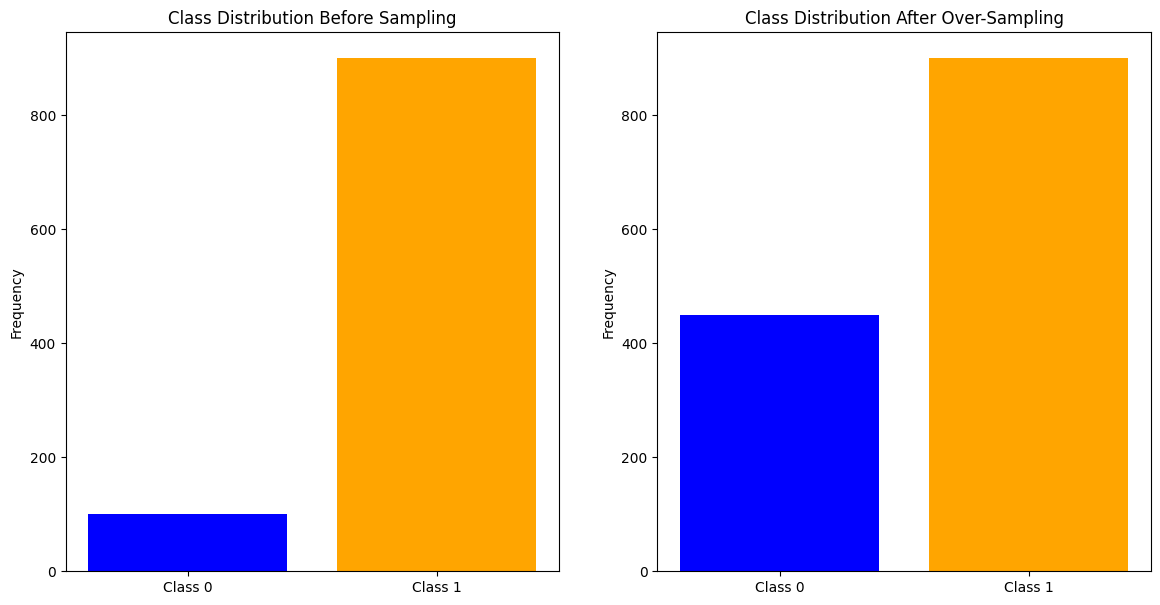

In [8]:
import numpy as np
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
import matplotlib.pyplot as plt

# Create a synthetic imbalanced dataset
X, y = make_classification(n_classes=2, class_sep=2,
                           weights=[0.1, 0.9], n_informative=3, n_redundant=1, flip_y=0,
                           n_features=20, n_clusters_per_class=1, n_samples=1000, random_state=10)

# Summarize class distribution
print(f"Before sampling: {Counter(y)}")

# Define the sampling strategy for over-sampling
# Over-sample the minority class to half of the majority class
strategy_over = 0.5  # Over-sample the minority class to 50% of the majority class

# Perform over-sampling
over = SMOTE(sampling_strategy=strategy_over, random_state=42)
X_over, y_over = over.fit_resample(X, y)

# Summarize the new class distribution after over-sampling
print(f"After over-sampling: {Counter(y_over)}")

# Plotting the class distribution before and after resampling
fig, axs = plt.subplots(1, 2, figsize=(14, 7))

# Before sampling
axs[0].bar(['Class 0', 'Class 1'], [Counter(y)[0], Counter(y)[1]], color=['blue', 'orange'])
axs[0].set_title('Class Distribution Before Sampling')
axs[0].set_ylabel('Frequency')

# After sampling
axs[1].bar(['Class 0', 'Class 1'], [Counter(y_over)[0], Counter(y_over)[1]], color=['blue', 'orange'])
axs[1].set_title('Class Distribution After Over-Sampling')
axs[1].set_ylabel('Frequency')

plt.show()


Before sampling: Counter({1: 2000, 0: 84})
After sampling: Counter({0: 2000, 1: 2000})


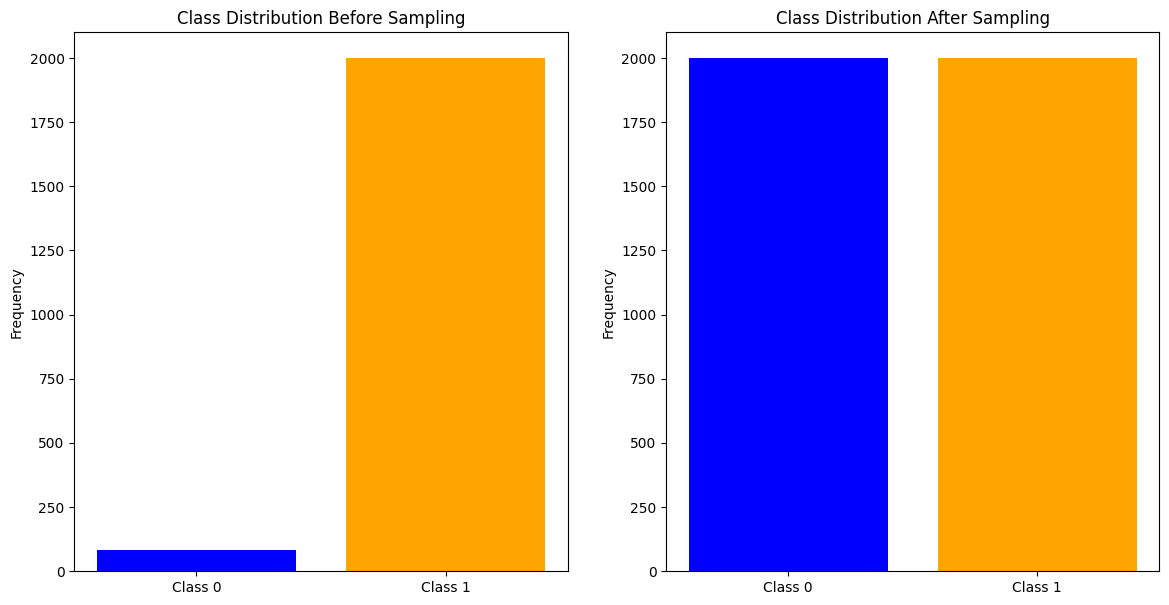

In [9]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
import matplotlib.pyplot as plt

# Assuming X and y are your features and labels

# Define the initial class distribution
initial_minority = 84
initial_majority = 2000

# Create a synthetic imbalanced dataset for the example
X, y = make_classification(n_classes=2, class_sep=2,
                           weights=[initial_minority/(initial_minority+initial_majority), 
                                    initial_majority/(initial_minority+initial_majority)], 
                           n_informative=3, n_redundant=1, flip_y=0,
                           n_features=20, n_clusters_per_class=1, 
                           n_samples=initial_minority+initial_majority, random_state=10)

# Summarize class distribution before sampling
print(f"Before sampling: {Counter(y)}")

# Define the sampling strategy for SMOTE (over-sampling) to be 1.0
# This will over-sample the minority class to have the same number of samples as the majority class
strategy_over = 1.0

# Define the sampling strategy for RandomUnderSampler (under-sampling) to be 1.0
# This will under-sample the majority class to have the same number of samples as the minority class
strategy_under = 1.0

# Create a pipeline that first over-samples the minority class, then under-samples the majority class
pipeline = Pipeline([
    ('over', SMOTE(sampling_strategy=strategy_over)),
    ('under', RandomUnderSampler(sampling_strategy=strategy_under))
])

# Apply the pipeline to the data
X_resampled, y_resampled = pipeline.fit_resample(X, y)

# Summarize class distribution after sampling
print(f"After sampling: {Counter(y_resampled)}")

# Plotting the class distribution before and after resampling
fig, axs = plt.subplots(1, 2, figsize=(14, 7))

# Before sampling
axs[0].bar(['Class 0', 'Class 1'], [Counter(y)[0], Counter(y)[1]], color=['blue', 'orange'])
axs[0].set_title('Class Distribution Before Sampling')
axs[0].set_ylabel('Frequency')

# After sampling
axs[1].bar(['Class 0', 'Class 1'], [Counter(y_resampled)[0], Counter(y_resampled)[1]], color=['blue', 'orange'])
axs[1].set_title('Class Distribution After Sampling')
axs[1].set_ylabel('Frequency')

plt.show()


Before sampling: Counter({1: 2000, 0: 84})
After sampling: Counter({1: 2000, 0: 1000})


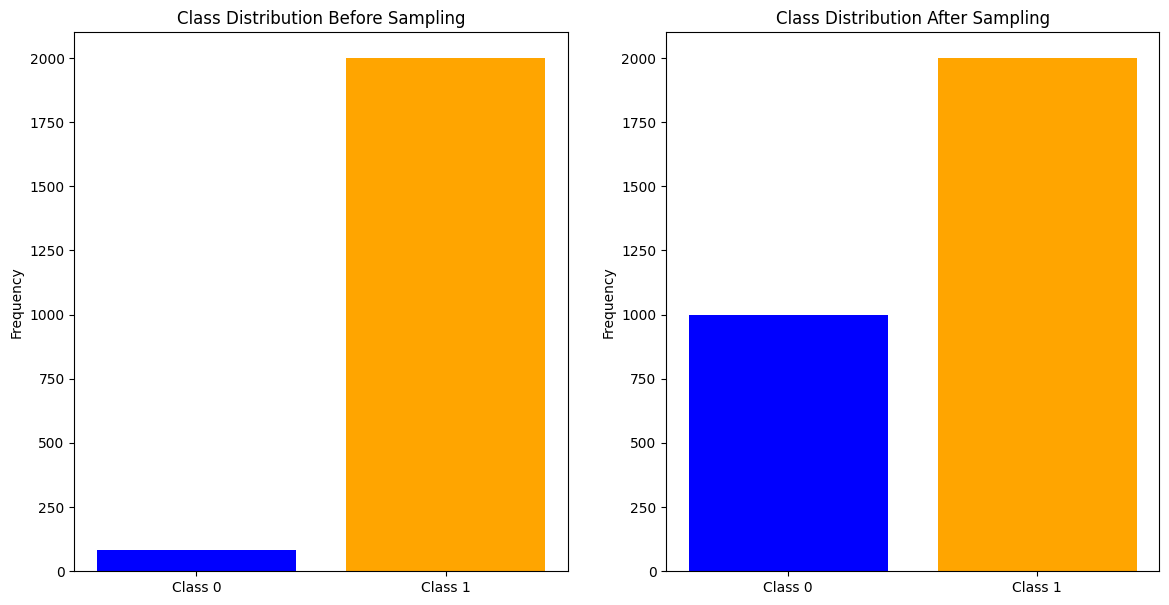

In [10]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
import matplotlib.pyplot as plt

# Define the initial class distribution
initial_minority = 84
initial_majority = 2000

# Create a synthetic imbalanced dataset for the example
X, y = make_classification(n_classes=2, class_sep=2,
                           weights=[initial_minority/(initial_minority+initial_majority), 
                                    initial_majority/(initial_minority+initial_majority)], 
                           n_informative=3, n_redundant=1, flip_y=0,
                           n_features=20, n_clusters_per_class=1, 
                           n_samples=initial_minority+initial_majority, random_state=10)

# Summarize class distribution before sampling
print(f"Before sampling: {Counter(y)}")

# Define the sampling strategy for SMOTE (over-sampling) to be 0.5
# This will over-sample the minority class to have half the number of samples as the majority class
strategy_over = 0.5

# Define the sampling strategy for RandomUnderSampler (under-sampling) to be 0.5
# This will under-sample the majority class to have twice the number of samples as the minority class
strategy_under = {0: int(initial_majority * strategy_over), 1: initial_majority}

# Create a pipeline that first over-samples the minority class, then under-samples the majority class
pipeline = Pipeline([
    ('over', SMOTE(sampling_strategy=strategy_over)),
    ('under', RandomUnderSampler(sampling_strategy=strategy_under))
])

# Apply the pipeline to the data
X_resampled, y_resampled = pipeline.fit_resample(X, y)

# Summarize class distribution after sampling
print(f"After sampling: {Counter(y_resampled)}")

# Plotting the class distribution before and after resampling
fig, axs = plt.subplots(1, 2, figsize=(14, 7))

# Before sampling
axs[0].bar(['Class 0', 'Class 1'], [Counter(y)[0], Counter(y)[1]], color=['blue', 'orange'])
axs[0].set_title('Class Distribution Before Sampling')
axs[0].set_ylabel('Frequency')

# After sampling
axs[1].bar(['Class 0', 'Class 1'], [Counter(y_resampled)[0], Counter(y_resampled)[1]], color=['blue', 'orange'])
axs[1].set_title('Class Distribution After Sampling')
axs[1].set_ylabel('Frequency')

plt.show()


In [ ]:
import numpy as np
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
import matplotlib.pyplot as plt

# Create a synthetic imbalanced dataset
X, y = make_classification(n_classes=2, class_sep=2,
                           weights=[0.1, 0.9], n_informative=3, n_redundant=1, flip_y=0,
                           n_features=20, n_clusters_per_class=1, n_samples=1000, random_state=10)

# Summarize class distribution
print(f"Before sampling: {Counter(y)}")

# Define the pipeline
over = SMOTE(sampling_strategy=0.1, random_state=42)
under = RandomUnderSampler(sampling_strategy=0.5, random_state=42)
pipeline = Pipeline(steps=[('o', over), ('u', under)])

# Transform the dataset
X_resampled, y_resampled = pipeline.fit_resample(X, y)

# Summarize the new class distribution
print(f"After sampling: {Counter(y_resampled)}")

# Plotting the class distribution before and after resampling
fig, axs = plt.subplots(1, 2, figsize=(14, 7))

# Before sampling
axs[0].bar(['Class 0', 'Class 1'], [Counter(y)[0], Counter(y)[1]], color=['blue', 'orange'])
axs[0].set_title('Class Distribution Before Sampling')
axs[0].set_ylabel('Frequency')

# After sampling
axs[1].bar(['Class 0', 'Class 1'], [Counter(y_resampled)[0], Counter(y_resampled)[1]], color=['blue', 'orange'])
axs[1].set_title('Class Distribution After Sampling')
axs[1].set_ylabel('Frequency')

plt.show()


In [11]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
X, y = make_classification(n_classes=2, class_sep=2,
weights=[0.1, 0.9], n_informative=3, n_redundant=1, flip_y=0,
n_features=20, n_clusters_per_class=1, n_samples=1000, random_state=10)
print('Original dataset shape %s' % Counter(y))
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

Original dataset shape Counter({1: 900, 0: 100})
Resampled dataset shape Counter({0: 900, 1: 900})


In [15]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.combine import SMOTEENN
X, y = make_classification(n_classes=2, class_sep=2,
    weights=[0.1, 0.9], n_informative=3, n_redundant=1, flip_y=0,
    n_features=20, n_clusters_per_class=1, n_samples=1000, random_state=10)
print('Original dataset shape %s' % Counter(y))
sme = SMOTEENN(random_state=42)
X_res, y_res = sme.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))


Original dataset shape Counter({1: 900, 0: 100})
Resampled dataset shape Counter({0: 900, 1: 881})


In [16]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import SMOTE

# Define the initial class distribution
initial_minority = 420
initial_majority = 2000

# Create a synthetic imbalanced dataset for the example
X, y = make_classification(n_classes=2, class_sep=2,
                           weights=[initial_minority/(initial_minority+initial_majority), 
                                    initial_majority/(initial_minority+initial_majority)], 
                           n_informative=3, n_redundant=1, flip_y=0,
                           n_features=20, n_clusters_per_class=1, 
                           n_samples=initial_minority+initial_majority, random_state=10)

print('Original dataset shape %s' % Counter(y))

# Define the sampling strategy for SMOTE
sampling_strategy = 1.0  # This will over-sample the minority class to have the same number of samples as the majority class

# Apply SMOTEENN
sme = SMOTEENN(smote=SMOTE(sampling_strategy=sampling_strategy), random_state=42)
X_res, y_res = sme.fit_resample(X, y)

print('Resampled dataset shape %s' % Counter(y_res))


Original dataset shape Counter({1: 2000, 0: 420})
Resampled dataset shape Counter({0: 1997, 1: 1996})
